In [1]:
import pandas as pd
import numpy as np
from show import *
from wanglijun import *
ipython_display_max_rows()

In [8]:
df = pd.DataFrame([dict(a=1,b=2),dict(a=3,b=4)],index=['x','y'])
df['x'] = range(2)
df

,a,b,x
x,1,2,0
y,3,4,1


<AxesSubplot: >

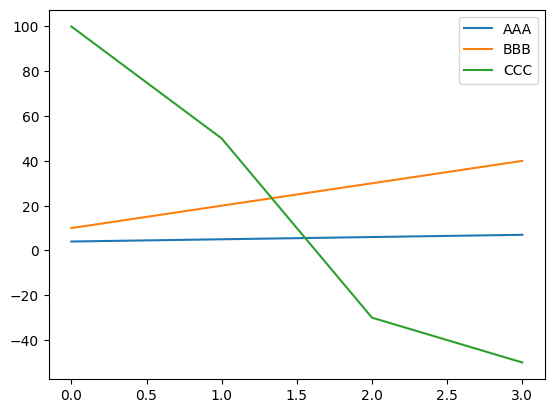

In [96]:
df.plot()

In [12]:
h(df.index)

Help on Index in module pandas.core.indexes.base object:

class Index(pandas.core.base.IndexOpsMixin, pandas.core.base.PandasObject)
 |  Index(data=None, dtype=None, copy=False, name=None, tupleize_cols=True, **kwargs) -> 'Index'
 |  
 |  Immutable sequence used for indexing and alignment.
 |  
 |  The basic object storing axis labels for all pandas objects.
 |  
 |  Parameters
 |  ----------
 |  data : array-like (1-dimensional)
 |  dtype : NumPy dtype (default: object)
 |      If dtype is None, we find the dtype that best fits the data.
 |      If an actual dtype is provided, we coerce to that dtype if it's safe.
 |      Otherwise, an error will be raised.
 |  copy : bool
 |      Make a copy of input ndarray.
 |  name : object
 |      Name to be stored in the index.
 |  tupleize_cols : bool (default: True)
 |      When True, attempt to create a MultiIndex if possible.
 |  
 |  See Also
 |  --------
 |  RangeIndex : Index implementing a monotonic integer range.
 |  CategoricalIndex : 

In [22]:
show_source(pd.core.base.IndexOpsMixin)

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01//EN"
 "http://www.w3.org/TR/html4/strict.dtd">
<!--
generated by Pygments 
Copyright 2006-2021 by the Pygments team.
Licensed under the BSD license, see LICENSE for details.
-->
 
 
 
 
 
 
 
 

 class IndexOpsMixin ( OpsMixin ): 
 """ 
 Common ops mixin to support a unified interface / docs for Series / Index 
 """ 

 # ndarray compatibility 
 __array_priority__ = 1000 
 _hidden_attrs : frozenset [ str ] = frozenset ( 
 [ "tolist" ] # tolist is not deprecated, just suppressed in the __dir__ 
 ) 

 @property 
 def dtype ( self ) -> DtypeObj : 
 # must be defined here as a property for mypy 
 raise AbstractMethodError ( self ) 

 @property 
 def _values ( self ) -> ExtensionArray | np . ndarray : 
 # must be defined here as a property for mypy 
 raise AbstractMethodError ( self ) 

 def transpose ( self : _T , * args , ** kwargs ) -> _T : 
 """ 
 Return the transpose, which is by definition self. 

 Returns 
 ------- 
 %(klass)s 
 """ 
 nv . validate_transpose ( args , kwargs ) 
 return self 

 T = property ( 
 transpose , 
 doc = """ 
 Return the transpose, which is by definition self. 
 """ , 
 ) 

 @property 
 def shape ( self ) -> Shape : 
 """ 
 Return a tuple of the shape of the underlying data. 
 """ 
 return self . _values . shape 

 def __len__ ( self ) -> int : 
 # We need this defined here for mypy 
 raise AbstractMethodError ( self ) 

 @property 
 def ndim ( self ) -> Literal [ 1 ]: 
 """ 
 Number of dimensions of the underlying data, by definition 1. 
 """ 
 return 1 

 def item ( self ): 
 """ 
 Return the first element of the underlying data as a Python scalar. 

 Returns 
 ------- 
 scalar 
 The first element of %(klass)s. 

 Raises 
 ------ 
 ValueError 
 If the data is not length-1. 
 """ 
 if len ( self ) == 1 : 
 return next ( iter ( self )) 
 raise ValueError ( "can only convert an array of size 1 to a Python scalar" ) 

 @property 
 def nbytes ( self ) -> int : 
 """ 
 Return the number of bytes in the underlying data. 
 """ 
 return self . _values . nbytes 

 @property 
 def size ( self ) -> int : 
 """ 
 Return the number of elements in the underlying data. 
 """ 
 return len ( self . _values ) 

 @property 
 def array ( self ) -> ExtensionArray : 
 """ 
 The ExtensionArray of the data backing this Series or Index. 

 Returns 
 ------- 
 ExtensionArray 
 An ExtensionArray of the values stored within. For extension 
 types, this is the actual array. For NumPy native types, this 
 is a thin (no copy) wrapper around :class:`numpy.ndarray`. 

 ``.array`` differs ``.values`` which may require converting the 
 data to a different form. 

 See Also 
 -------- 
 Index.to_numpy : Similar method that always returns a NumPy array. 
 Series.to_numpy : Similar method that always returns a NumPy array. 

 Notes 
 ----- 
 This table lays out the different array types for each extension 
 dtype within pandas. 

 ================== ============================= 
 dtype array type 
 ================== ============================= 
 category Categorical 
 period PeriodArray 
 interval IntervalArray 
 IntegerNA IntegerArray 
 string StringArray 
 boolean BooleanArray 
 datetime64[ns, tz] DatetimeArray 
 ================== ============================= 

 For any 3rd-party extension types, the array type will be an 
 ExtensionArray. 

 For all remaining dtypes ``.array`` will be a 
 :class:`arrays.NumpyExtensionArray` wrapping the actual ndarray 
 stored within. If you absolutely need a NumPy array (possibly with 
 copying / coercing data), then use :meth:`Series.to_numpy` instead. 

 Examples 
 -------- 
 For regular NumPy types like int, and float, a PandasArray 
 is returned. 

 >>> pd.Series([1, 2, 3]).array 
 <PandasArray> 
 [1, 2, 3] 
 Length: 3, dtype: int64 

 For extension types, like Categorical, the actual ExtensionArray 
 is returned 

 >>> ser = pd.Series(pd.Categorical(['a', 'b', 'a'])) 
 >>> ser.array 
 ['a', 'b', 'a'] 
 Categories (2, object): ['a', 'b'] 
 """ 
 

In [25]:
df.transpose()

,x,y
a,1,3
b,2,4
x,0,1


In [4]:
df[['a','b']]

,a,b
0,1,2
1,3,4


In [5]:
desc(df)

>>>> <class 'type'>
>>>> <class 'weakref.ReferenceType'>


,type,sig,value,overwrite
__module__,str,,pandas.core.frame,
__class__,type,,DataFrame,
__dict__,dict,,"(_is_copy, _mgr, _item_cache, _attrs, _flags)",
__sizeof__,method,()->int,160,▧
__format__,builtin_function_or_method,"(format_spec, /) -> ▧",<built-in method __format__ of DataFrame objec...,
__str__,method-wrapper,()->str,a b\n0 1 2\n1 3 4,
__repr__,method,()->str,a b\n0 1 2\n1 3 4,▧
__new__,builtin_function_or_method,"(*args, **kwargs) -> ▧",<built-in method __new__ of type object at 0x1...,
__init__,method,()->NoneType,None,▧
__add__,method,(other) -> ▧,<bound method OpsMixin.__add__ of Empty DataFr...,▧


In [8]:
x = pd.Series({'a':1,'b':2, 'c':3})
x

a    1
b    2
c    3
dtype: int64

In [10]:
x.to_dict()

{'a': 1, 'b': 2, 'c': 3}

In [16]:
m = {1:2,2:9,3:78}
print(x.map(lambda x: x*2))
x.map(m)


a    2
b    4
c    6
dtype: int64


a     2
b     9
c    78
dtype: int64

In [23]:
x.values

array([1, 2, 3])

In [31]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)), columns=list("abcd"))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)), columns=list("abcde"))

df2.loc[1, "b"] = np.nan

In [34]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [35]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [37]:
df1.add(df2, fill_value=8)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,12.0
1,9.0,13.0,13.0,15.0,17.0
2,18.0,20.0,22.0,24.0,22.0
3,23.0,24.0,25.0,26.0,27.0


In [62]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [69]:
df.iloc[[1,2]]

,AAA,BBB,CCC
1,5,20,50
2,6,30,-30


In [74]:
x = df['AAA'] > 5

In [83]:
x.index

RangeIndex(start=0, stop=4, step=1)

In [61]:
xs = type(df)(
     data = {
         'a b':[1,2],
         'c':[3,4]
     }       
)

xs.dtypes

a b    int64
c      int64
dtype: object

In [6]:
df.AAA >= 5

0    False
1     True
2     True
3     True
Name: AAA, dtype: bool

In [7]:
df.loc[df.AAA >=5]

,AAA,BBB,CCC
1,5,20,50
2,6,30,-30
3,7,40,-50


In [12]:
df_mask = pd.DataFrame(
    {"AAA": [True] * 4, "BBB": [False] * 4, "CCC": [True, False] * 2}
)


df_mask
df.where(df_mask, -1000)

,AAA,BBB,CCC
0,4,-1000,100
1,5,-1000,-1000
2,6,-1000,-30
3,7,-1000,-1000


In [41]:
from show import *

In [29]:
h(df.iloc)

<?xml version="1.0" encoding="utf-8" ?>
<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
 
 
 
 
 <string> 

 
 
 


 Purely integer-location based indexing for selection by position. 
 .iloc[] is primarily integer position based (from 0 to
 length-1 of the axis), but may also be used with a boolean
array. 
 Allowed inputs are: 
 
 An integer, e.g. 5 . 
 A list or array of integers, e.g. [4, 3, 0] . 
 A slice object with ints, e.g. 1:7 . 
 A boolean array. 
 A callable function with one argument (the calling Series or
DataFrame) and that returns valid output for indexing (one of the above).
This is useful in method chains, when you don't have a reference to the
calling object, but would like to base your selection on some value. 
 A tuple of row and column indexes. The tuple elements consist of one of the
above inputs, e.g. (0, 1) . 
 
 .iloc will raise IndexError if a requested indexer is
out-of-bounds, except slice indexers which allow out-of-bounds
indexing (this conforms with python/numpy slice semantics). 
 See more at :ref:`Selection by Position <indexing.integer>` . 
 
 System Message: ERROR/3 ( <string> , line 25); backlink 
Unknown interpreted text role "ref". 
 
 See Also 
 DataFrame.iat : Fast integer location scalar accessor.
DataFrame.loc : Purely label-location based indexer for selection by label.
Series.iloc : Purely integer-location based indexing for 
 
 System Message: ERROR/3 ( <string> , line 32) 
Unexpected indentation. 
 
selection by position. 
 
 
 Examples 
 
>>> mydict = [{'a': 1, 'b': 2, 'c': 3, 'd': 4},
... {'a': 100, 'b': 200, 'c': 300, 'd': 400},
... {'a': 1000, 'b': 2000, 'c': 3000, 'd': 4000 }]
>>> df = pd.DataFrame(mydict)
>>> df
 a b c d
0 1 2 3 4
1 100 200 300 400
2 1000 2000 3000 4000
 
 Indexing just the rows 
 With a scalar integer. 
 
>>> type(df.iloc[0])
<class 'pandas.core.series.Series'>
>>> df.iloc[0]
a 1
b 2
c 3
d 4
Name: 0, dtype: int64
 
 With a list of integers. 
 
>>> df.iloc[[0]]
 a b c d
0 1 2 3 4
>>> type(df.iloc[[0]])
<class 'pandas.core.frame.DataFrame'>
 
 
>>> df.iloc[[0, 1]]
 a b c d
0 1 2 3 4
1 100 200 300 400
 
 With a slice object. 
 
>>> df.iloc[:3]
 a b c d
0 1 2 3 4
1 100 200 300 400
2 1000 2000 3000 4000
 
 With a boolean mask the same length as the index. 
 
>>> df.iloc[[True, False, True]]
 a b c d
0 1 2 3 4
2 1000 2000 3000 4000
 
 With a callable, useful in method chains. The x passed
to the lambda is the DataFrame being sliced. This selects
the rows whose index label even. 
 
>>> df.iloc[lambda x: x.index % 2 == 0]
 a b c d
0 1 2 3 4
2 1000 2000 3000 4000
 
 Indexing both axes 
 You can mix the indexer types for the index and columns. Use : to
select the entire axis. 
 With scalar integers. 
 
>>> df.iloc[0, 1]
2
 
 With lists of integers. 
 
>>> df.iloc[[0, 2], [1, 3]]
 b d
0 2 4
2 2000 4000
 
 With slice objects. 
 
>>> df.iloc[1:3, 0:3]
 a b c
1 100 200 300
2 1000 2000 3000
 
 With a boolean array whose length matches the columns. 
 
>>> df.iloc[:, [True, False, True, False]]
 a c
0 1 3
1 100 300
2 1000 3000
 
 With a callable function that expects the Series or DataFrame. 
 
>>> df.iloc[:, lambda df: [0, 2]]
 a c
0 1 3
1 100 300
2 1000 3000

In [28]:
# create the levels and labels for the multi-index
levels = [['Level 1 - A', 'Level 1 - B'], ['Level 2 - X', 'Level 2 - Y']]
labels = [[0, 0, 1, 1], [0, 1, 0, 1]]

# create the multi-index
multiindex = pd.MultiIndex(levels=levels, codes=labels)

# create the data
data = [[1, 2, 3, 4], [5, 6, 7, 8]]

# create the DataFrame
df = pd.DataFrame(data, columns=multiindex)
df

Level 1 - A             Level 1 - B            
  Level 2 - X Level 2 - Y Level 2 - X Level 2 - Y
0           1           2           3           4
1           5           6           7           8

In [90]:
d = pd.DataFrame(
    {
    'x':['x1','x2'],
    'y':['y1','y2'],
    },
    index=['a','b']
)
a = pd.Series([True,False],index=['a','b'])
b = pd.Series([False, True],index=['a','b'])

In [89]:
a | b

a    True
b    True
dtype: bool

In [93]:
d[a&b]

,x,y
